<a href="https://colab.research.google.com/github/kharkovsailing/Projects/blob/master/python_two_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Data

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

Creating dataframe

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Data Preparations

In [ ]:
df["at"] = pd.to_datetime(df["at"])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at": "Дата", "val": "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df.set_index("Дата", inplace=True)

Creating Grafics

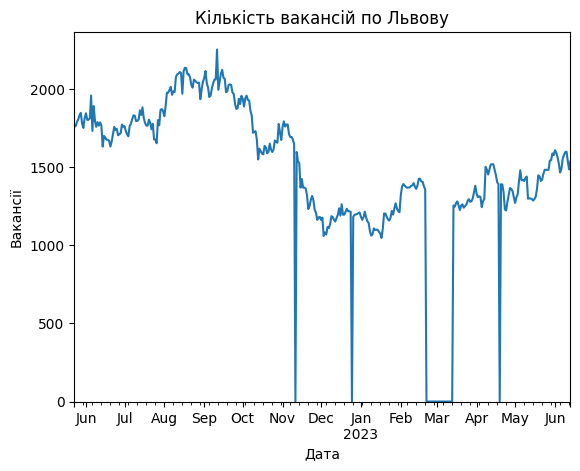

In [ ]:
df['Вакансії'].plot()
plt.title("Кількість вакансій по Львову")
plt.xlabel("Дата")
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df['Вакансії'] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df['Вакансії'].interpolate()

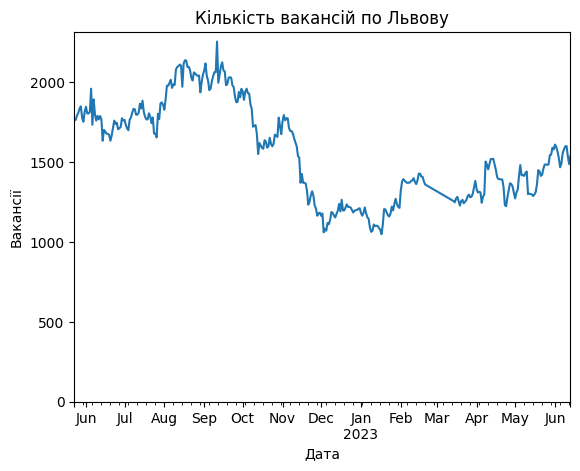

In [ ]:
df['Вакансії'].plot()
plt.title("Кількість вакансій по Львову")
plt.xlabel("Дата")
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
from pandas.core import window
df["rolling_mean"] = df['Вакансії'].rolling(window=7).mean()

In [ ]:
df

,Вакансії,rolling_mean
Дата,,
2022-05-23,1759.0,NaN
2022-05-24,1763.0,NaN
2022-05-25,1790.0,NaN
2022-05-26,1806.0,NaN
2022-05-27,1833.0,NaN
...,...,...
2023-06-09,1597.0,1538.714286
2023-06-10,1599.0,1543.714286
2023-06-11,1536.0,1545.571429


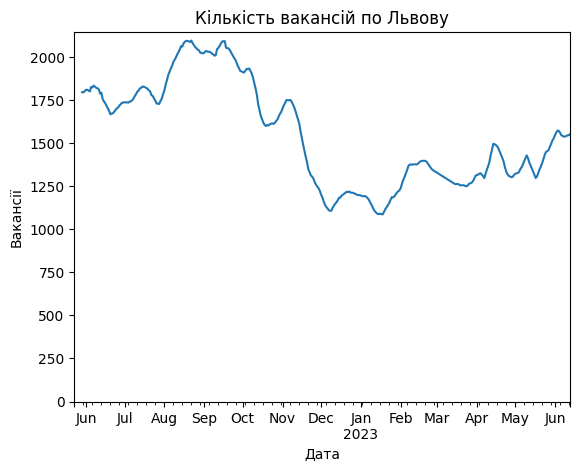

In [ ]:
df['rolling_mean'].plot()
plt.title("Кількість вакансій по Львову")
plt.xlabel("Дата")
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling_mean
count,387.000000,381.000000
mean,5816.724806,5808.536745
std,912.306537,880.827433
min,4116.000000,4253.428571
25%,5227.500000,5270.714286
50%,5693.681818,5729.714286
75%,6420.000000,6391.857143
max,7920.000000,7730.714286


Second Part

In [19]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json = response.json()

In [20]:
df_kiev = pd.DataFrame(data_json['data'])

In [21]:
df_kiev.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [23]:
df_kiev["at"] = pd.to_datetime(df_kiev["at"])
df_kiev = df_kiev.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_kiev.set_index("Дата", inplace=True)
df_kiev['Вакансії'] = df_kiev['Вакансії'].replace(0, np.nan)
df_kiev['Вакансії'] = df_kiev['Вакансії'].interpolate()
df_kiev["rolling_mean"] = df_kiev['Вакансії'].rolling(window=7).mean()

In [24]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Дніпро")
data_json = response.json()

In [25]:
df_dnipro = pd.DataFrame(data_json['data'])

In [28]:
df_dnipro.head()

,Вакансії,rolling_mean
Дата,,
2022-05-23,702.0,NaN
2022-05-24,726.0,NaN
2022-05-25,715.0,NaN
2022-05-26,742.0,NaN
2022-05-27,768.0,NaN


In [27]:
df_dnipro["at"] = pd.to_datetime(df_dnipro["at"])
df_dnipro = df_dnipro.rename(columns = {"at": "Дата", "val": "Вакансії"})
df_dnipro.set_index("Дата", inplace=True)
df_dnipro['Вакансії'] = df_dnipro['Вакансії'].replace(0, np.nan)
df_dnipro['Вакансії'] = df_dnipro['Вакансії'].interpolate()
df_dnipro["rolling_mean"] = df_dnipro['Вакансії'].rolling(window=7).mean()

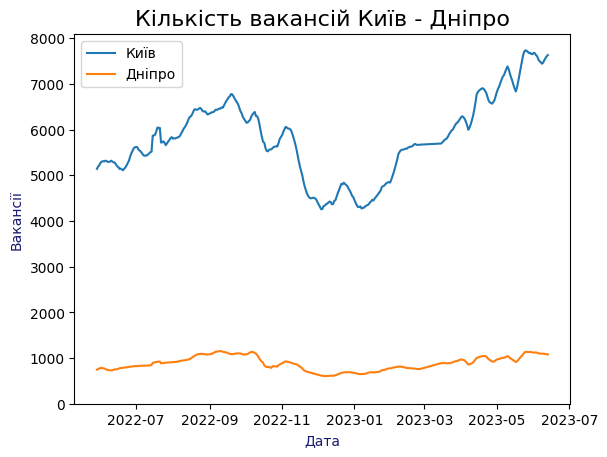

In [30]:
fig, axs = plt.subplots()
axs.plot(df_kiev.index, df_kiev["rolling_mean"], label = "Київ")
axs.plot(df_dnipro.index, df_dnipro["rolling_mean"], label = "Дніпро")
plt.title("Кількість вакансій Київ - Дніпро", fontsize=16)
plt.xlabel("Дата", color="midnightblue")
plt.ylabel('Вакансії', color="midnightblue")
plt.ylim(bottom=0)
plt.legend()
plt.show()